## Importing Packages

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,TargetEncoder,FunctionTransformer
from joblib import dump, load

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

### Loading dataframe

In [3]:

df1_cervical = pd.read_csv("/Volumes/DriveA/iLab_work/cervical_cancer/Cervical_Cancer_last.csv")

### Displaying Dataframe

In [4]:
df1_cervical

,States_and_territories,Year,Age,Higher_risk_Participants
0,NSW,2018,25-74,11985
1,Vic,2018,25-74,10200
2,Qld,2018,25-74,9000
3,WA,2018,25-74,3624
4,SA,2018,25-74,3036
5,Tas,2018,25-74,689
6,ACT,2018,25-74,529
7,NT,2018,25-74,468
8,NSW,2019,25-74,10701
9,Vic,2019,25-74,9389


### Resetting index

In [5]:
df1_cervical.reset_index(drop=True, inplace=True)

### Assessing the NAN values

In [6]:
df1_cervical.isna().sum()

States_and_territories      0
Year                        0
Age                         0
Higher_risk_Participants    0
dtype: int64

### Extracting the column names

In [7]:
df1_cervical.columns

Index(['States_and_territories', 'Year', 'Age', 'Higher_risk_Participants'], dtype='object')

### Extracting the details of dataframe

In [8]:
df1_cervical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   States_and_territories    40 non-null     object
 1   Year                      40 non-null     int64 
 2   Age                       40 non-null     object
 3   Higher_risk_Participants  40 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


### Dropping target column from the X and assigning to Y

In [9]:
X = df1_cervical.drop(['Higher_risk_Participants'], axis=1)  # Features
y = df1_cervical['Higher_risk_Participants']  # Target

### Viewing the columns in X

In [10]:
X

,States_and_territories,Year,Age
0,NSW,2018,25-74
1,Vic,2018,25-74
2,Qld,2018,25-74
3,WA,2018,25-74
4,SA,2018,25-74
5,Tas,2018,25-74
6,ACT,2018,25-74
7,NT,2018,25-74
8,NSW,2019,25-74
9,Vic,2019,25-74


In [11]:
y

0     11985
1     10200
2      9000
3      3624
4      3036
5       689
6       529
7       468
8     10701
9      9389
10     8264
11     3237
12     2546
13      577
14      447
15      429
16     5705
17     5200
18     3943
19     1621
20     1157
21      272
22      252
23      242
24     3922
25     4465
26     2957
27     1264
28      811
29      246
30      154
31      181
32     3189
33     3286
34     2360
35     1013
36      668
37      221
38      138
39      151
Name: Higher_risk_Participants, dtype: int64

### Displaying the unique columns in Y

In [12]:
y.unique()

array([11985, 10200,  9000,  3624,  3036,   689,   529,   468, 10701,
        9389,  8264,  3237,  2546,   577,   447,   429,  5705,  5200,
        3943,  1621,  1157,   272,   252,   242,  3922,  4465,  2957,
        1264,   811,   246,   154,   181,  3189,  3286,  2360,  1013,
         668,   221,   138,   151])

### Splitting the dataset into train, validation and test set

In [13]:
from sklearn.model_selection import train_test_split

X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import LabelEncoder
#Instantiate and fit LabelEncoder on y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.fit_transform(y_val)

### Printing the shape of train, validation and test set

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(25, 3)
(25,)
(7, 3)
(7,)
(8, 3)
(8,)


## Base Line Model

### Computing the mean value of y_train and assigning it to variable pred_value

In [16]:
pred_value = y_train.mean()

### Creating a base line model

In [17]:
import numpy as np
y_base = np.full((len(y_train), 1), pred_value)

y_base

array([[2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8],
       [2914.8]])

### Importing modules

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

### Printing scores of baseline model

In [19]:
print("The mse score of baseline model is:",mse(y_base, y_train, squared=False))
print("The mae score of baseline model is:",mae(y_base, y_train))

The mse score of baseline model is: 3622.0852447174684
The mae score of baseline model is: 2789.68


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Modelling

## Model -1  GradientBoostingRegressor

### Create an instance of GradientBoostingRegressor

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
gcb_Regressor =GradientBoostingRegressor()

### Creating Pipeline

In [21]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [22]:
States_and_territories_col = 'States_and_territories'
Year_col = 'Year'
Age_col = 'Age'
 

In [23]:
States_and_territories_col_cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [24]:
Year_col_cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [25]:
Age_col_cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

### Initializing a preprocessor

In [26]:
from sklearn.compose import ColumnTransformer

# Define your preprocessor and transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('States_and_territories_col_cat', States_and_territories_col_cat_transformer, [States_and_territories_col]),
        ('Year_col_cat', Year_col_cat_transformer, [Year_col]),
        ('Age_col_cat', Age_col_cat_transformer, [Age_col])
    ],
    remainder='drop'
)


In [27]:
y_train.isna().sum().sum()

0

In [28]:
X_train

,States_and_territories,Year,Age
22,ACT,2020,25-74
5,Tas,2018,25-74
39,NT,2022,25-74
13,Tas,2019,25-74
21,Tas,2020,25-74
31,NT,2021,25-74
11,WA,2019,25-74
33,Vic,2022,25-74
32,NSW,2022,25-74
6,ACT,2018,25-74


In [29]:
y_train

22      252
5       689
39      151
13      577
21      272
31      181
11     3237
33     3286
32     3189
6       529
25     4465
18     3943
9      9389
35     1013
20     1157
23      242
30      154
38      138
3      3624
8     10701
0     11985
1     10200
7       468
36      668
34     2360
Name: Higher_risk_Participants, dtype: int64

### Initializing a pipeline

In [30]:
gcb_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('gcb_Regressor', GradientBoostingRegressor(n_estimators=10, learning_rate=0.1, max_depth=6, min_samples_split=10, random_state=42))
    ]
)     


In [31]:
X_train.columns

Index(['States_and_territories', 'Year', 'Age'], dtype='object')

### Fitting model into a pipeline

In [32]:
gcb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('States_and_territories_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['States_and_territories']),
                                                 ('Year_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year']),
                                                 ('Age_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('gcb_Regressor',
                 GradientBoostingRegressor(max_depth=6, min_samples_split=10,
                                           n_estimators=10, random_state=42))])

In [33]:
import pandas as pd

# Assuming y_train is your pandas Series
if y_train.ndim == 1:
    print("y_train is a 1D array")
else:
    print("y_train is not a 1D array")

y_train is a 1D array


In [34]:
import numpy as np

# Assuming y_train is your 1D array
unique_values = np.unique(y_train)
print("Unique values in y_train:", unique_values)


Unique values in y_train: [  138   151   154   181   242   252   272   468   529   577   668   689
  1013  1157  2360  3189  3237  3286  3624  3943  4465  9389 10200 10701
 11985]


### Train Prediction

In [35]:
y_train_preds = gcb_pipe.predict(X_train)

In [36]:
print('The mean squared error for train set is:' , mse(y_train, y_train_preds, squared=False))
print('The mean absolute error for train set is: ' ,mae(y_train, y_train_preds))

The mean squared error for train set is: 1942.4897411445927
The mean absolute error for train set is:  1473.2173127739513


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Validation Prediction

In [37]:
y_val_preds = gcb_pipe.predict(X_val)

In [38]:

print('The mean squared error of validation set is : ',mse(y_val, y_val_preds, squared=False))
print('The mean absoulte error of validation set is: ',mae(y_val, y_val_preds)) 

The mean squared error of validation set is :  3202.671147394012
The mean absoulte error of validation set is:  2447.9249004815633


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Test Prediction

In [39]:
y_test_preds = gcb_pipe.predict(X_test)
print('The mean squared error of test set is :', mse(y_test, y_test_preds, squared=False))
print('The mean absoulte error of test set is: ',mae(y_test, y_test_preds))  

The mean squared error of test set is : 1145.4059873109165
The mean absoulte error of test set is:  1068.103036757333


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
#saving the model:
from joblib import dump
#dump(gcb_pipe,'cervical_cancer_gcb_1.joblib')

In [41]:
from joblib import dump
dump(gcb_pipe,'cervical_cancer_gcb_3.joblib')

['cervical_cancer_gcb_3.joblib']

In [42]:
dump(gcb_pipe,'cervical_cancer_gcb_4.joblib')

['cervical_cancer_gcb_4.joblib']

#### Upgrating scikit learn package

In [43]:
!pip install --upgrade scikit-learn


# Model -2  AdaBoostRegressor

In [44]:
from sklearn.ensemble import AdaBoostRegressor

In [45]:
gcb_Regressor = AdaBoostRegressor()

### Initializing a pipeline

In [46]:
ada_pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('ada_Regressor',AdaBoostRegressor(n_estimators=50, learning_rate=1.0, loss='linear', random_state=42))
         
         
    ]
)  

### Fitting a model into a pipeline

In [47]:
ada_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('States_and_territories_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['States_and_territories']),
                                                 ('Year_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year']),
                                                 ('Age_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('ada_Regressor', AdaBoostRegressor(random_state=42))])

### Train Prediction

In [48]:
y_train_preds = ada_pipe.predict(X_train)

In [49]:
print('The mean squared error for train set is:' , mse(y_train, y_train_preds, squared=False))
print('The mean absolute error for train set is: ' ,mae(y_train, y_train_preds))

The mean squared error for train set is: 556.2772856262305
The mean absolute error for train set is:  382.38058929958936


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Validation Prediction

In [50]:
print('The mean squared error of validation set is : ',mse(y_val, y_val_preds, squared=False))
print('The mean absoulte error of validation set is: ',mae(y_val, y_val_preds)) 

The mean squared error of validation set is :  3202.671147394012
The mean absoulte error of validation set is:  2447.9249004815633


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Test Prediction

In [51]:
y_test_preds = gcb_pipe.predict(X_test)
print('The mean squared error of test set is :', mse(y_test, y_test_preds, squared=False))
print('The mean absoulte error of test set is: ',mae(y_test, y_test_preds))  

The mean squared error of test set is : 1145.4059873109165
The mean absoulte error of test set is:  1068.103036757333


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Saving Model

In [52]:
from joblib import dump
dump(ada_pipe,'cervical_cancer_ada_2.joblib')

['cervical_cancer_ada_2.joblib']

# Model -3    GradientBoostingRegressor

In [53]:
num_transformer = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

### Making a preprocessor

In [54]:
gcb_pipe_1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('gcb_Regressor', GradientBoostingRegressor(n_estimators=14, learning_rate=0.1, max_depth=10, min_samples_split=16, random_state=42))
    ]
) 

In [55]:
gcb_pipe_1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('States_and_territories_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['States_and_territories']),
                                                 ('Year_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year']),
                                                 ('Age_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('gcb_Regressor',
                 GradientBoostingRegressor(max_depth=10, min_samples_split=16,
                                           n_estimators=14, random_state=42))])

### Train Prediction

In [56]:
y_train_preds = gcb_pipe_1.predict(X_train)

In [57]:
print('The mean squared error for train set is:' , mse(y_train, y_train_preds, squared=False))
print('The mean absolute error for train set is: ' ,mae(y_train, y_train_preds))

The mean squared error for train set is: 1615.5623909887054
The mean absolute error for train set is:  1256.397693621026


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Vaidation set Prediction

In [58]:
y_val_preds = gcb_pipe.predict(X_val)

In [59]:

print('The mean squared error of validation set is : ',mse(y_val, y_val_preds, squared=False))
print('The mean absoulte error of validation set is: ',mae(y_val, y_val_preds)) 

The mean squared error of validation set is :  3202.671147394012
The mean absoulte error of validation set is:  2447.9249004815633


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Test Prediction

In [60]:
y_test_preds = gcb_pipe.predict(X_test)
print('The mean squared error of test set is :', mse(y_test, y_test_preds, squared=False))
print('The mean absoulte error of test set is: ',mae(y_test, y_test_preds))  

The mean squared error of test set is : 1145.4059873109165
The mean absoulte error of test set is:  1068.103036757333


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Model saving

In [61]:
#saving the model:
from joblib import dump
dump(gcb_pipe_1,'cervical_cancer_gcb_2.joblib')

['cervical_cancer_gcb_2.joblib']

# Model -4 RandomForestRegressor

### Splitting data into train and test set

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
States_and_territories_col = 'States_and_territories'
Year_col = 'Year'
Age_col = 'Age'

States_and_territories_col_cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)
 
Year_col_cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)
 
Age_col_cat_transformer = Pipeline(
    steps=[
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

### Initializing Preprocessor

In [64]:
from sklearn.compose import ColumnTransformer

# Define your preprocessor and transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('States_and_territories_col_cat', States_and_territories_col_cat_transformer, [States_and_territories_col]),
        ('Year_col_cat', Year_col_cat_transformer, [Year_col]),
        ('Age_col_cat', Age_col_cat_transformer, [Age_col])
    ],
    remainder='drop'
)

### Setting Pipeling

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Define the XGBoost pipeline with preprocessor and regressor steps
cervical_RandomForestR_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming preprocessor is defined earlier
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Tuple format: (name, estimator)
])



### Fitting model into pipeline

In [66]:
cervical_RandomForestR_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('States_and_territories_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['States_and_territories']),
                                                 ('Year_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Year']),
                                                 ('Age_col_cat',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Age'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [67]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

### Train Prediction

In [68]:
y_train_preds = cervical_RandomForestR_pipeline.predict(X_train)
print('The mean squared error for train set is:' , mse(y_train, y_train_preds, squared=False))
print('The mean absolute error for train set is: ' ,mae(y_train, y_train_preds))

The mean squared error for train set is: 1026.6701853382615
The mean absolute error for train set is:  753.9300000000001


/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Test Prediction

In [69]:
y_test_preds = cervical_RandomForestR_pipeline.predict(X_test)
print('The mean squared error of test set is :', mse(y_test, y_test_preds, squared=False))
print('The mean absoulte error of test set is: ',mae(y_test, y_test_preds))

/Users/mahjabeenmohiuddin/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The mean squared error of test set is : 1388.6508956717669
The mean absoulte error of test set is:  1090.5025


### Saving Model

In [70]:
#saving the model:
from joblib import dump
dump(cervical_RandomForestR_pipeline,'cervical_RandomForestR_pipeline.joblib')

['cervical_RandomForestR_pipeline.joblib']

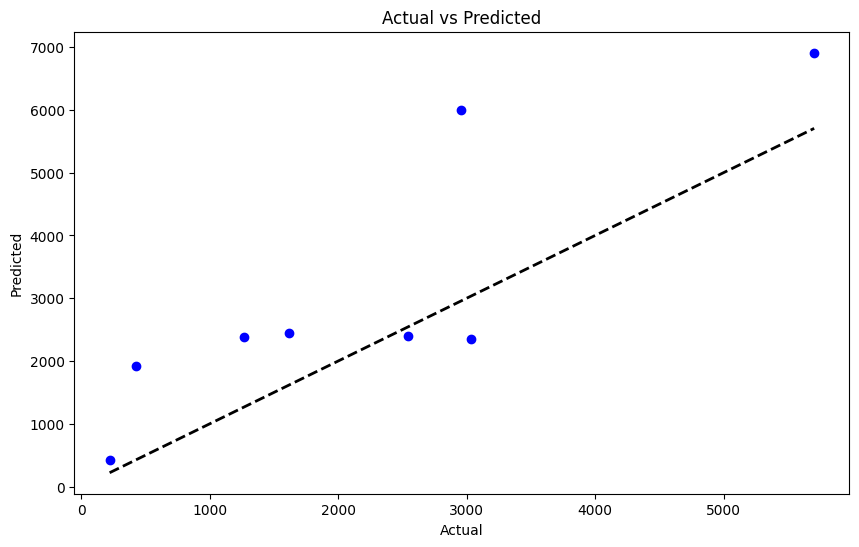

In [71]:
import matplotlib.pyplot as plt

# Make predictions on the test set using the best model
y_pred_best = cervical_RandomForestR_pipeline.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

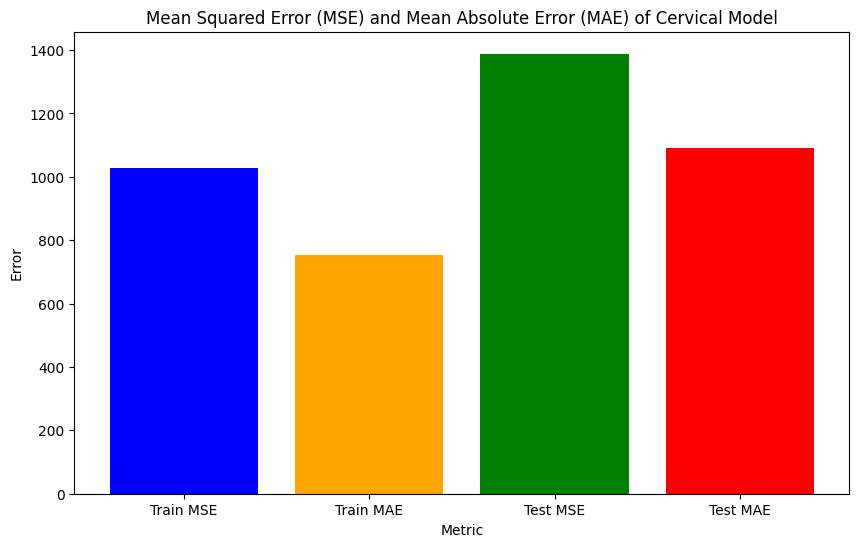

In [72]:
import matplotlib.pyplot as plt

# Define data
train_mse = 1026.6701853382615
train_mae = 753.9300000000001
test_mse = 1388.6508956717669
test_mae = 1090.5025

# Plot
labels = ['Train MSE', 'Train MAE', 'Test MSE', 'Test MAE']
values = [train_mse, train_mae, test_mse, test_mae]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Squared Error (MSE) and Mean Absolute Error (MAE) of Cervical Model')
plt.xlabel('Metric')
plt.ylabel('Error')
plt.show()


In [74]:
df2_cervical =pd.read_csv("/Volumes/DriveA/iLab_work/cervical_cancer/cervical_abnormality_primary_screening_tests_2018_2022.csv")

In [75]:
df2_cervical

,States_and_territories,Latitude,Longitude,Year,Age,Low_risk,Low_Riske_Per,Intermediate_risk,Intermediate_risk_Per,Higher_risk,...,Oncogenic_HPV_detected_Perc,Oncogenic_HPV_not_detected,Oncogenic_HPV_not_detected_Perc,Oncogenic_HPV_any_type_detected,Oncogenic_HPV_any_type_detected_Perc,offered_HPV_vaccination,offered_HPV_vaccination_Perc,Male_Income,Female_Income,Person_Income
0,NSW,-31.840233,145.612793,2018,25-74,443961,91.4,28739,5.9,11985,...,2.1,30548,6.3,40705,8.4,3772,2.3,1454.5,1033.2,1240.6
1,Vic,-37.020100,144.964600,2018,25-74,387567,90.7,28056,6.6,10200,...,2.0,30513,7.1,38876,9.1,3122,2.1,1383.9,954.9,1171.8
2,Qld,-20.917574,142.702789,2018,25-74,282367,90.8,19051,6.1,9000,...,2.5,20630,6.6,28274,9.1,2770,2.6,1439.6,921.5,1166.3
3,WA,-25.042261,117.793221,2018,25-74,151339,91.0,10866,6.5,3624,...,1.8,11506,6.9,14569,8.8,1359,2.3,1645.6,968.6,1318.7
4,SA,-30.000233,136.209152,2018,25-74,108939,91.5,6792,5.7,3036,...,2.2,7341,6.2,9941,8.4,889,2.3,1266.0,890.3,1075.0
5,Tas,-41.454520,145.970660,2018,25-74,32146,91.7,2132,6.1,689,...,1.6,2287,6.5,2855,8.2,196,1.9,1255.3,839.4,1036.6
6,ACT,-35.473470,149.012370,2018,25-74,25467,92.0,1628,5.9,529,...,1.6,1735,6.3,2167,7.8,175,1.7,1645.6,1245.3,1433.9
7,NT,-19.491411,132.550964,2018,25-74,12976,87.8,1256,8.5,468,...,2.7,1347,9.1,1749,11.9,167,2.5,1657.3,1160.6,1409.1
8,NSW,-31.840233,145.612793,2019,25-74,427839,91.6,27620,5.9,10701,...,2.0,29245,6.3,38455,8.2,3374,2.0,1520.2,1055.3,1282.3
9,Vic,-37.020100,144.964600,2019,25-74,382567,91.3,25979,6.2,9389,...,1.9,27878,6.7,35885,8.6,2879,1.9,1490.6,1035.0,1262.6


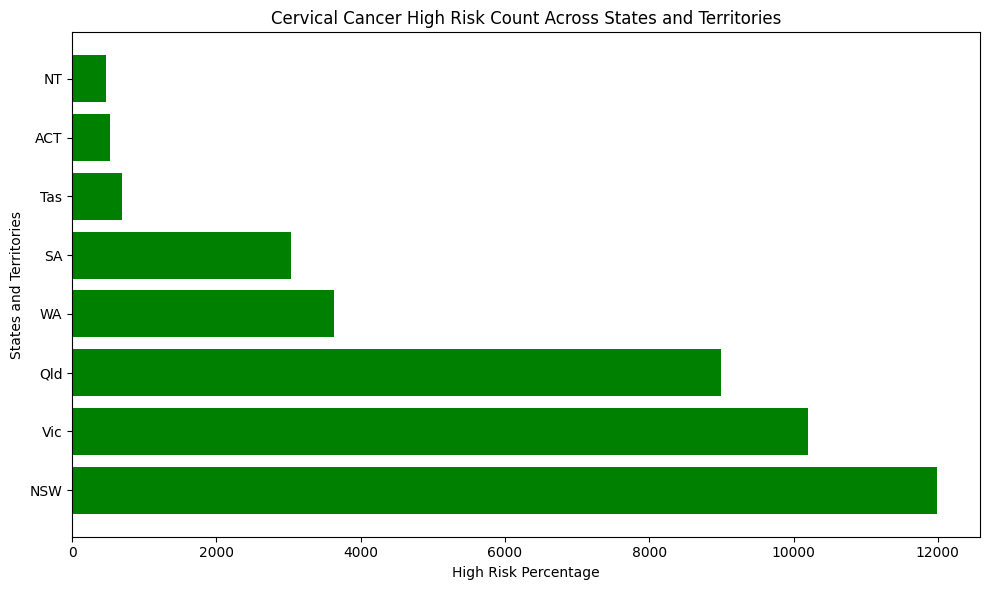

In [77]:
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df2_cervical["States_and_territories"], df2_cervical["Higher_risk"], color='green')
plt.xlabel('High Risk Percentage')
plt.ylabel('States and Territories')
plt.title('Cervical Cancer High Risk Count Across States and Territories')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### EDA on HPV DETECTED and OFFERED VACCINE

In [ ]:
df3_cervical = pd.read_csv("/Volumes/DriveA/iLab_work/cervical_cancer/1_cervical_abnormality_primary_screening_tests_2018_2022.csv")

In [ ]:
df3_cervical

,States_and_territories,Latitude,Longitude,Year,Age,High_risk_Per,Oncogenic_HPV_detected,offered_HPV_vaccination
0,NSW,-31.840233,145.612793,2018,25-74,2.5,10157,3772
1,Vic,-37.020100,144.964600,2018,25-74,2.4,8363,3122
2,Qld,-20.917574,142.702789,2018,25-74,2.9,7644,2770
3,WA,-25.042261,117.793221,2018,25-74,2.2,3063,1359
4,SA,-30.000233,136.209152,2018,25-74,2.5,2600,889
5,Tas,-41.454520,145.970660,2018,25-74,2.0,568,196
6,ACT,-35.473470,149.012370,2018,25-74,1.9,432,175
7,NT,-19.491411,132.550964,2018,25-74,3.2,402,167
8,NSW,-31.840233,145.612793,2019,25-74,2.3,9210,3374
9,Vic,-37.020100,144.964600,2019,25-74,2.2,8007,2879


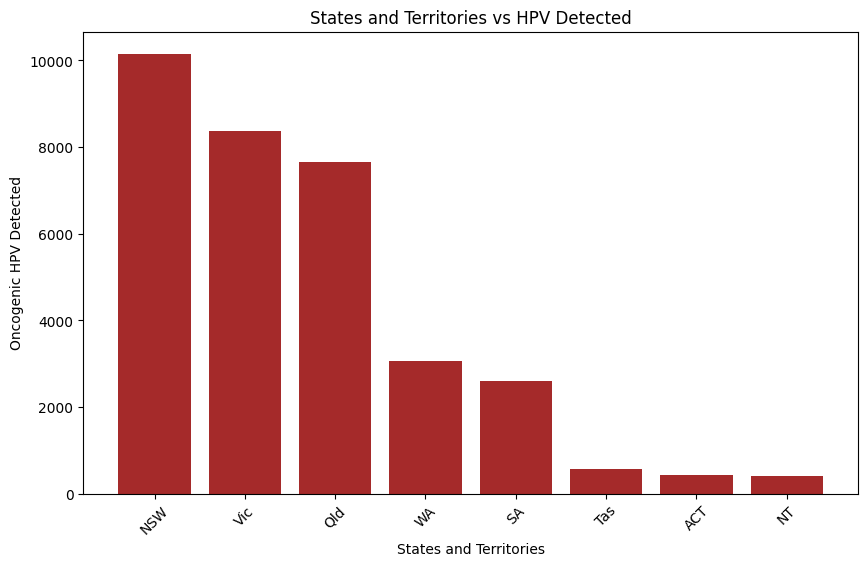

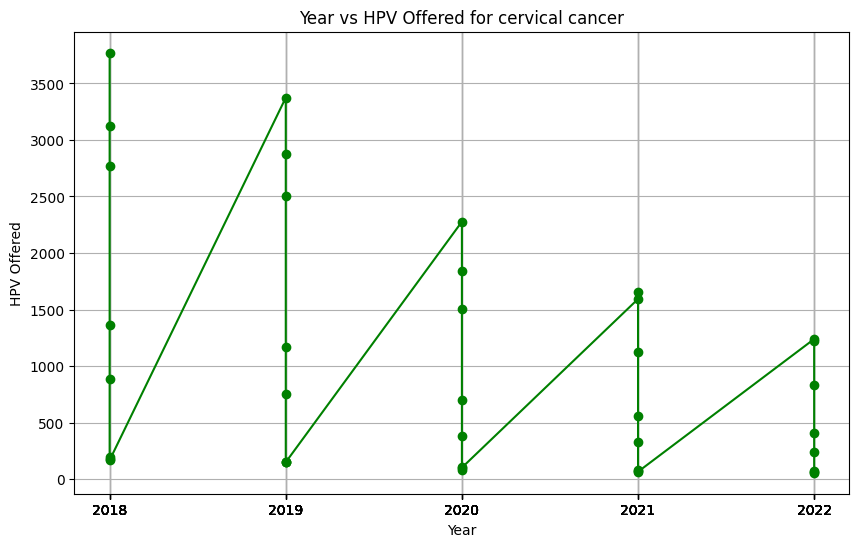

In [ ]:
# Plot State vs HPV Detected
plt.figure(figsize=(10, 6))
plt.bar(df3_cervical["States_and_territories"], df3_cervical["Oncogenic_HPV_detected"], color='brown')
plt.xlabel('States and Territories')
plt.ylabel('Oncogenic HPV Detected')
plt.title('States and Territories vs HPV Detected')
plt.xticks(rotation=45)
plt.show()

# Plot Year vs HPV Offered
plt.figure(figsize=(10, 6))
plt.plot(df3_cervical["Year"], df3_cervical["offered_HPV_vaccination"], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('HPV Offered')
plt.title('Year vs HPV Offered for cervical cancer')
plt.xticks(df3_cervical["Year"])
plt.grid(True)
plt.show()

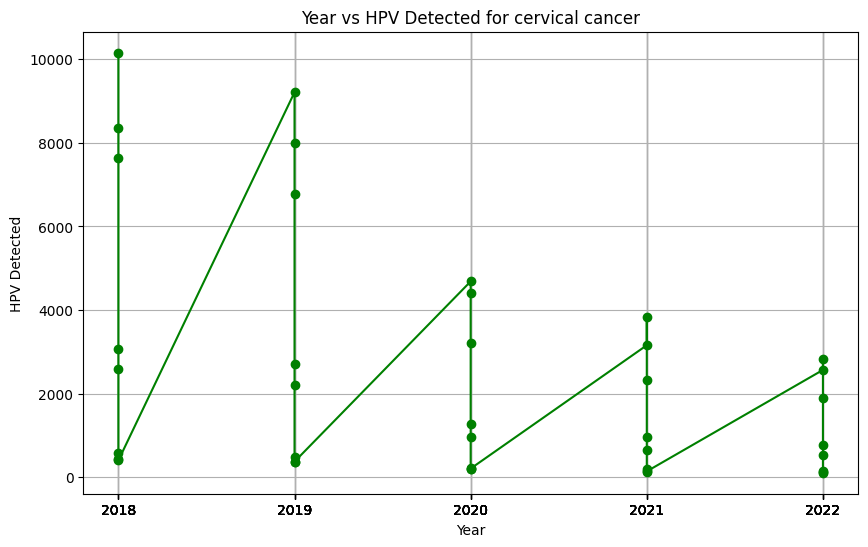

In [ ]:
# Plot Year vs HPV Offered
plt.figure(figsize=(10, 6))
plt.plot(df3_cervical["Year"], df3_cervical["Oncogenic_HPV_detected"], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('HPV Detected')
plt.title('Year vs HPV Detected for cervical cancer')
plt.xticks(df3_cervical["Year"])
plt.grid(True)
plt.show()

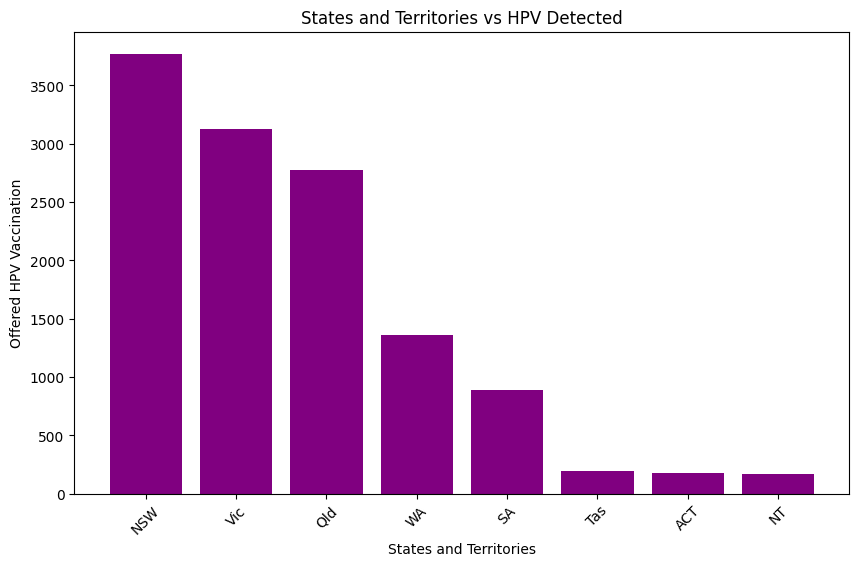

In [ ]:
# Plot Year vs HPV Offered
plt.figure(figsize=(10, 6))
plt.bar(df3_cervical["States_and_territories"], df3_cervical["offered_HPV_vaccination"], color='purple')
plt.xlabel('States and Territories')
plt.ylabel('Offered HPV Vaccination')
plt.title('States and Territories vs HPV Detected')
plt.xticks(rotation=45)
plt.show()



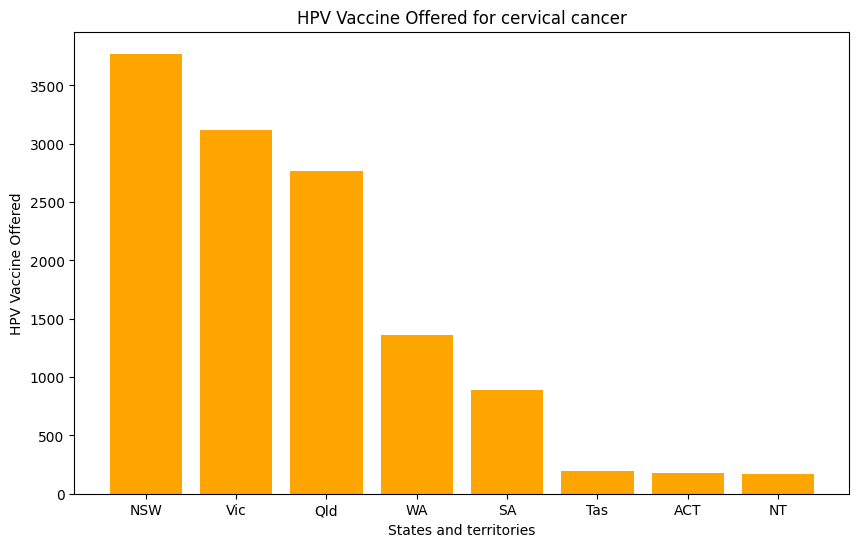

In [ ]:
# Plot Age vs HPV Offered
plt.figure(figsize=(10, 6))
plt.bar(df3_cervical["States_and_territories"], df3_cervical["offered_HPV_vaccination"], color='orange')
plt.xlabel('States and territories')
plt.ylabel('HPV Vaccine Offered')
plt.title('HPV Vaccine Offered for cervical cancer')
plt.show()

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_29671/801695711.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', num_states)


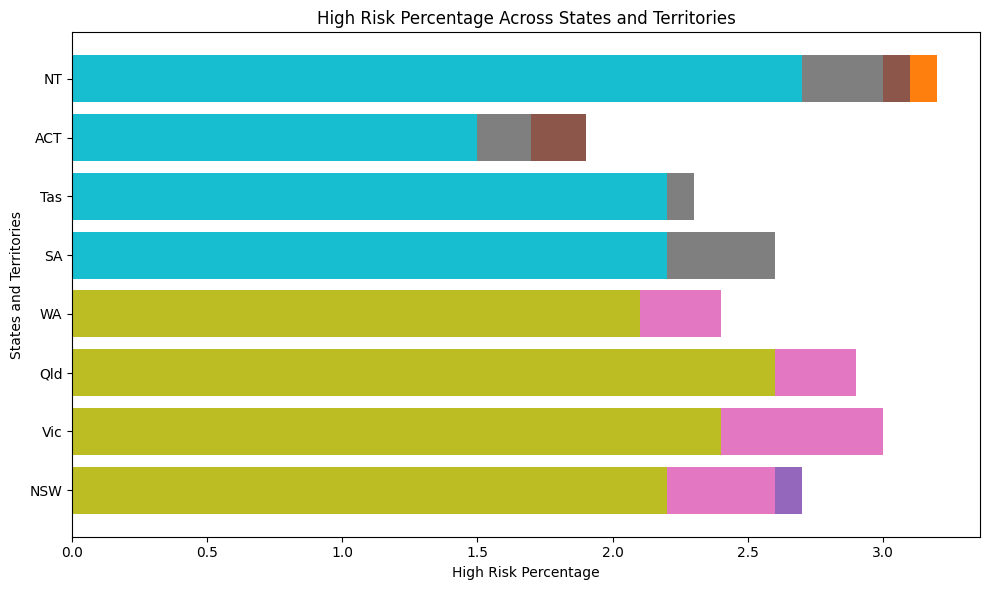

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
states = df3_cervical["States_and_territories"]
high_risk_percentage = df3_cervical["High_risk_Per"]

# Generate a list of unique colors for each state
num_states = len(states)
colors = plt.cm.get_cmap('tab10', num_states)

# Plot a horizontal bar chart with each state highlighted in a different color
plt.figure(figsize=(10, 6))
bars = plt.barh(states, high_risk_percentage, color=colors(np.arange(num_states)))

# Add labels and title
plt.xlabel('High Risk Percentage')
plt.ylabel('States and Territories')
plt.title('High Risk Percentage Across States and Territories')

# Show plot
plt.tight_layout()
plt.show()


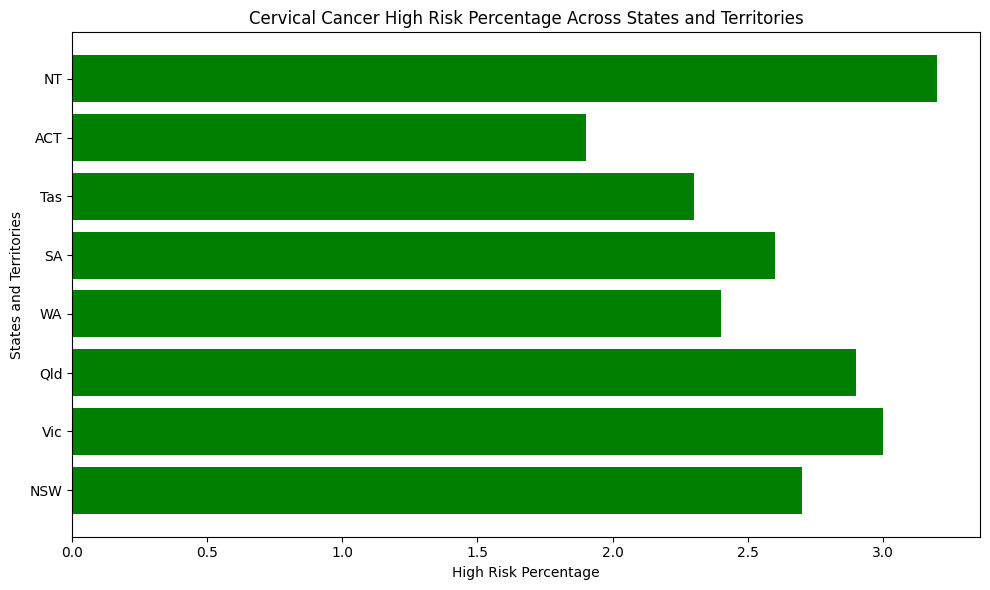

In [ ]:
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df3_cervical["States_and_territories"], df3_cervical["High_risk_Per"], color='green')
plt.xlabel('High Risk Percentage')
plt.ylabel('States and Territories')
plt.title('Cervical Cancer High Risk Percentage Across States and Territories')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()